Expectation -Maximization algorithm

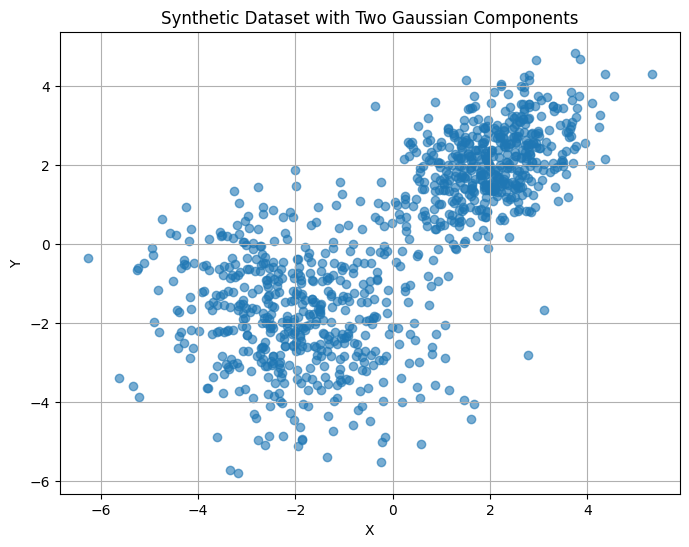

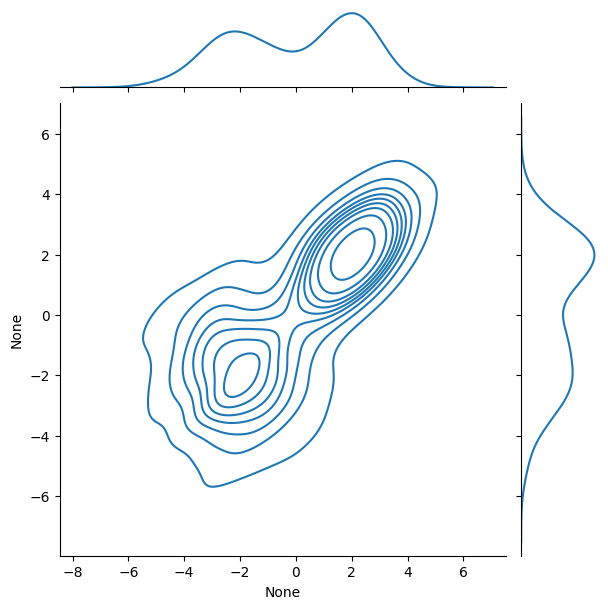

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal

# Generate synthetic dataset with two Gaussian components
np.random.seed(42)

# Parameters for the first Gaussian component
mu1 = np.array([2, 2])
cov1 = np.array([[1, 0.5], [0.5, 1]])

# Parameters for the second Gaussian component
mu2 = np.array([-2, -2])
cov2 = np.array([[2, -0.5], [-0.5, 2]])

# Number of data points
n_samples = 1000

# Generate data points
data1 = np.random.multivariate_normal(mu1, cov1, int(n_samples/2))
data2 = np.random.multivariate_normal(mu2, cov2, int(n_samples/2))
data = np.vstack([data1, data2])

# Plot the synthetic dataset
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], alpha=0.6)
plt.title('Synthetic Dataset with Two Gaussian Components')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

# Plot density estimation using seaborn
sns.jointplot(x=data[:, 0], y=data[:, 1], kind='kde')
plt.show()


C:\Users\Kunal\AppData\Local\Temp\ipykernel_10824\2278925579.py:35: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  log_likelihood = np.sum(np.log(np.sum(pi_new[k] * multivariate_normal.pdf(data, mu_new[k], cov_new[k])


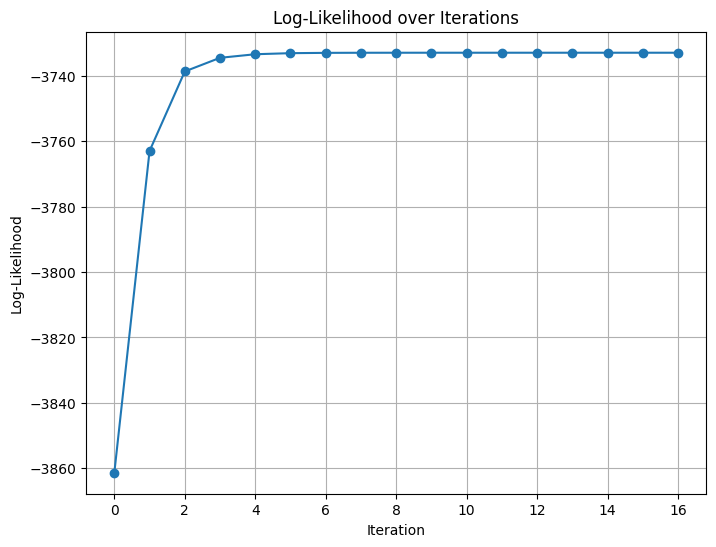

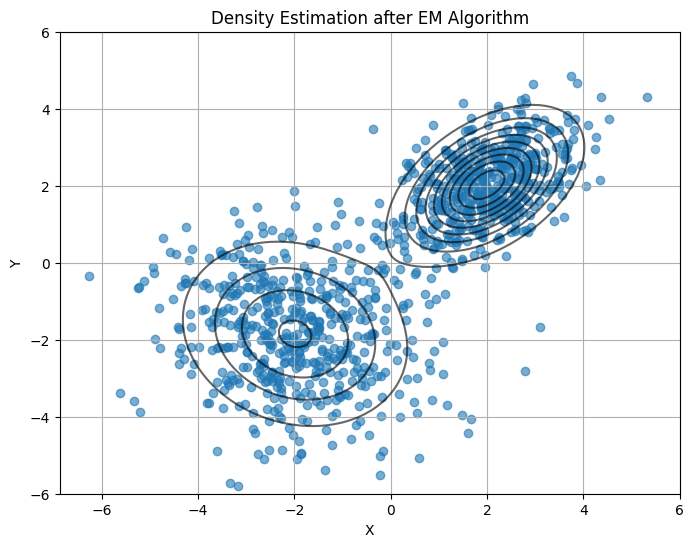

In [4]:
# Initialize parameters for the EM algorithm
# Randomly initialize the means, covariances, and mixing coefficients
np.random.seed(42)
mu_init = np.random.randn(2, 2)
cov_init = [np.eye(2), np.eye(2)]  # Diagonal covariance matrices
pi_init = np.array([0.5, 0.5])  # Equal mixing coefficients

# Implement the EM algorithm
def expectation_maximization(data, mu_init, cov_init, pi_init, max_iter=100, tol=1e-6):
    n_samples, n_features = data.shape
    n_components = len(pi_init)
    
    # Initialize parameters
    mu = mu_init
    cov = cov_init
    pi = pi_init
    
    # Initialize log-likelihood
    log_likelihoods = []
    
    for _ in range(max_iter):
        # E-step
        gamma = np.zeros((n_samples, n_components))
        for k in range(n_components):
            gamma[:, k] = pi[k] * multivariate_normal.pdf(data, mean=mu[k], cov=cov[k])
        gamma /= np.sum(gamma, axis=1)[:, np.newaxis]
        
        # M-step
        mu_new = np.dot(gamma.T, data) / np.sum(gamma, axis=0)[:, np.newaxis]
        cov_new = [np.dot((gamma[:, k] * (data - mu_new[k]).T), (data - mu_new[k])) / np.sum(gamma[:, k])
                   for k in range(n_components)]
        pi_new = np.mean(gamma, axis=0)
        
        # Compute log-likelihood
        log_likelihood = np.sum(np.log(np.sum(pi_new[k] * multivariate_normal.pdf(data, mu_new[k], cov_new[k])
                                               for k in range(n_components))))
        log_likelihoods.append(log_likelihood)
        
        # Check for convergence
        if len(log_likelihoods) > 1 and np.abs(log_likelihoods[-1] - log_likelihoods[-2]) < tol:
            break
        
        # Update parameters
        mu = mu_new
        cov = cov_new
        pi = pi_new
    
    return mu, cov, pi, log_likelihoods

# Perform EM algorithm
mu_est, cov_est, pi_est, log_likelihoods = expectation_maximization(data, mu_init, cov_init, pi_init)

# Plot log-likelihood over iterations
plt.figure(figsize=(8, 6))
plt.plot(log_likelihoods, marker='o')
plt.title('Log-Likelihood over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Log-Likelihood')
plt.grid(True)
plt.show()

# Plot the density estimation after EM
def gmm_pdf(data, mu, cov, pi):
    pdf = np.zeros(data.shape[0])
    for k in range(len(pi)):
        pdf += pi[k] * multivariate_normal.pdf(data, mean=mu[k], cov=cov[k])
    return pdf

x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)
X, Y = np.meshgrid(x, y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

plt.figure(figsize=(8, 6))
plt.contour(X, Y, gmm_pdf(pos.reshape(-1, 2), mu_est, cov_est, pi_est).reshape(X.shape), levels=10, colors='k', alpha=0.6)
plt.scatter(data[:, 0], data[:, 1], alpha=0.6)
plt.title('Density Estimation after EM Algorithm')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()
